In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas_datareader

print(tf.__version__)


/home/luisarmandovillarreal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.1


In [2]:
df = pd.read_csv('data_daily.csv')
df.head()

ticker        date  compound
0   AAPL  2019-03-04  0.110123
1   AAPL  2019-03-05  0.091783
2   AAPL  2019-03-06  0.060471
3   AAPL  2019-03-07  0.073557
4   AAPL  2019-03-08  0.114928

In [3]:
df.at[df[df.ticker=='BRK'].index,'ticker'] = 'BRK-B'
df['ticker'].unique()

array(['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMGN', 'AMZN', 'AVGO', 'BA', 'BAC',
       'BRK-B', 'C', 'CMCSA', 'CRM', 'CSCO', 'CVX', 'DIS', 'DWDP', 'FB',
       'GOOG', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'LLY',
       'MA', 'MCD', 'MDT', 'MMM', 'MRK', 'MSFT', 'NFLX', 'NKE', 'ORCL',
       'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'T', 'UNH', 'UNP', 'V', 'VZ',
       'WFC', 'WMT', 'XOM'], dtype=object)

In [4]:
tickers = df['ticker'].unique()

In [5]:
start_date = '2019-03-01'
end_date = '2019-03-29'

df_daily_prices = pandas_datareader.get_data_yahoo(tickers, start_date, end_date)['Adj Close']

In [6]:
data = []
for stock in df_daily_prices.columns:
    
    for i in range(len(df_daily_prices[stock])-1):
        
        data.append([stock,
                     df_daily_prices[stock].index[i+1].to_pydatetime().strftime('%Y-%m-%d'),
                     np.log(df_daily_prices[stock][i+1]/df_daily_prices[stock][i])])

df_stock_daily_changes = pd.DataFrame(data,columns=['ticker','date', 'change'])
df_stock_daily_changes.head()

ticker        date    change
0   AAPL  2019-03-04  0.005017
1   AAPL  2019-03-05 -0.001821
2   AAPL  2019-03-06 -0.005771
3   AAPL  2019-03-07 -0.011642
4   AAPL  2019-03-08  0.002374

In [7]:
df = df.merge(df_stock_daily_changes, how='right', left_on=['ticker', 'date'], right_on=['ticker', 'date'])


In [8]:
df['compound'].fillna(0, inplace = True)
df.head()

ticker        date  compound    change
0   AAPL  2019-03-04  0.110123  0.005017
1   AAPL  2019-03-05  0.091783 -0.001821
2   AAPL  2019-03-06  0.060471 -0.005771
3   AAPL  2019-03-07  0.073557 -0.011642
4   AAPL  2019-03-08  0.114928  0.002374

In [9]:
for index, row in df.iterrows():
    try:
        df.at[index+1, 'change_1'] = row['change']
        df.at[index+2, 'change_2'] = row['change']
        df.at[index+3, 'change_3'] = row['change']
        df.at[index+4, 'change_4'] = row['change']
    except:
        pass
    
    try:
        df.at[index+1, 'compound_1'] = row['compound']
        df.at[index+2, 'compound_2'] = row['compound']
        df.at[index+3, 'compound_3'] = row['compound']
        df.at[index+4, 'compound_4'] = row['compound']
    except:
        pass
        

In [10]:
for index, row in df.iterrows():
    if row['date']=='2019-03-04':
        df.at[index,'change_1'] = np.nan
        df.at[index,'change_2'] = np.nan
        df.at[index,'change_3'] = np.nan
        df.at[index,'change_4'] = np.nan
        
        df.at[index,'compound_1'] = np.nan
        df.at[index,'compound_2'] = np.nan
        df.at[index,'compound_3'] = np.nan
        df.at[index,'compound_4'] = np.nan
    
    elif row['date']=='2019-03-05':
        df.at[index,'change_2'] = np.nan
        df.at[index,'change_3'] = np.nan
        df.at[index,'change_4'] = np.nan
        
        df.at[index,'compound_2'] = np.nan
        df.at[index,'compound_3'] = np.nan
        df.at[index,'compound_4'] = np.nan
    
    elif row['date']=='2019-03-06':
        df.at[index,'change_3'] = np.nan
        df.at[index,'change_4'] = np.nan
        
        df.at[index,'compound_3'] = np.nan
        df.at[index,'compound_4'] = np.nan
    
    elif row['date']=='2019-03-07':
        df.at[index,'change_4'] = np.nan
        
        df.at[index,'compound_4'] = np.nan
    

In [11]:
df = df[df.date>'2019-03-07']

In [12]:
df.isna().sum()


ticker        0
date          0
compound      0
change        0
change_1      0
change_2      0
change_3      0
change_4      0
compound_1    0
compound_2    0
compound_3    0
compound_4    0
dtype: int64

In [13]:
df=df.sort_values(by='date')

In [40]:
df_train = df.sample(frac=0.8, random_state=0)
df_test = df.drop(df_train.index)

In [41]:
df_train_stats = df_train.describe()
df_train_stats.pop('change')
df_train_stats.pop('compound')
df_train_stats = df_train_stats.transpose()
df_train_stats


count      mean       std       min       25%       50%       75%  \
change_1    627.0  0.000835  0.012550 -0.068417 -0.005472  0.002116  0.008790   
change_2    627.0  0.000347  0.012893 -0.068417 -0.005962  0.001264  0.008466   
change_3    627.0  0.000869  0.013100 -0.068417 -0.005173  0.001702  0.008790   
change_4    627.0 -0.000101  0.012525 -0.068417 -0.006107  0.000981  0.007104   
compound_1  627.0  0.102307  0.123825 -0.624900  0.029671  0.096320  0.152287   
compound_2  627.0  0.104192  0.121658 -0.624900  0.028570  0.097500  0.156288   
compound_3  627.0  0.105627  0.129349 -0.624900  0.027343  0.096514  0.153782   
compound_4  627.0  0.104330  0.128863 -0.624900  0.026089  0.095092  0.155710   

                 max  
change_1    0.044803  
change_2    0.079147  
change_3    0.079147  
change_4    0.044803  
compound_1  0.847350  
compound_2  0.659700  
compound_3  0.847350  
compound_4  0.847350

In [42]:
df_train_labels = df_train.pop('change')
df_train.pop('compound')
df_train.pop('ticker')
df_train.pop('date')
df_test_labels = df_test.pop('change')
df_test.pop('compound')
df_test.pop('ticker')
df_test.pop('date')
pass

In [43]:
df_train_stats['mean']

change_1      0.000835
change_2      0.000347
change_3      0.000869
change_4     -0.000101
compound_1    0.102307
compound_2    0.104192
compound_3    0.105627
compound_4    0.104330
Name: mean, dtype: float64

In [44]:
def norm(x):
    
    for index,row in x.iterrows():
        x.at[index, 'change_1'] = (row['change_1'] - df_train_stats['mean'][0]) / df_train_stats['std'][0]
        x.at[index, 'change_2'] = (row['change_2'] - df_train_stats['mean'][1]) / df_train_stats['std'][1]
        x.at[index, 'change_3'] = (row['change_3'] - df_train_stats['mean'][2]) / df_train_stats['std'][2]
        x.at[index, 'change_4'] = (row['change_4'] - df_train_stats['mean'][3]) / df_train_stats['std'][3]
        
        x.at[index, 'compound_1'] = (row['compound_1'] - df_train_stats['mean'][4]) / df_train_stats['std'][4]
        x.at[index, 'compound_2'] = (row['compound_2'] - df_train_stats['mean'][5]) / df_train_stats['std'][5]
        x.at[index, 'compound_3'] = (row['compound_3'] - df_train_stats['mean'][6]) / df_train_stats['std'][6]
        x.at[index, 'compound_4'] = (row['compound_4'] - df_train_stats['mean'][7]) / df_train_stats['std'][7]
        
    
    return x
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)


In [45]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(df_train.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

model = build_model()


In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [47]:
normed_train_data.head()

change_1  change_2  change_3  change_4  compound_1  compound_2  \
960 -0.679107  0.975854 -0.599380 -1.281087   -0.128253    0.071545   
414 -0.225648 -0.949667 -0.566269 -0.309787    1.471118    1.140632   
133  1.250707 -0.156901 -1.141240  1.575524    0.467947    0.614629   
854 -2.742423  0.553770 -0.144970 -0.790367   -0.571795   -2.235699   
901 -2.457964  0.292223  0.629259  0.434454   -0.297215   -0.387902   

     compound_3  compound_4  
960   -0.065748   -1.696905  
414    1.019865    1.328657  
133   -0.244509    0.570916  
854    1.515052    0.020171  
901   -0.528944   -0.541854

In [48]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.24405137],
       [-0.19105859],
       [-0.20302801],
       [-0.06017758],
       [-0.08807832],
       [-0.6091866 ],
       [ 0.15954548],
       [ 0.24481924],
       [-0.13412651],
       [ 0.01422504]], dtype=float32)

In [49]:
#df_train_labels = df_train_labels.apply(lambda row: 0 if row < 0 else 1)
#df_test_labels = df_test_labels.apply(lambda row: 0 if row < 0 else 1)

In [50]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, 
    df_train_labels,
    epochs=EPOCHS, 
    validation_split = 0.2, 
    verbose=0,
    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [51]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


val_loss  val_mean_absolute_error  val_mean_squared_error      loss  \
995  0.000261                 0.012188                0.000261  0.000004   
996  0.000263                 0.012305                0.000263  0.000004   
997  0.000251                 0.012029                0.000251  0.000003   
998  0.000250                 0.011916                0.000250  0.000003   
999  0.000247                 0.011923                0.000247  0.000003   

     mean_absolute_error  mean_squared_error  epoch  
995             0.001445            0.000004    995  
996             0.001433            0.000004    996  
997             0.001271            0.000003    997  
998             0.001395            0.000003    998  
999             0.001259            0.000003    999

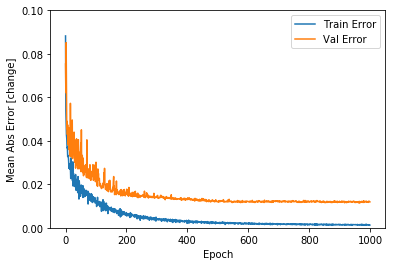

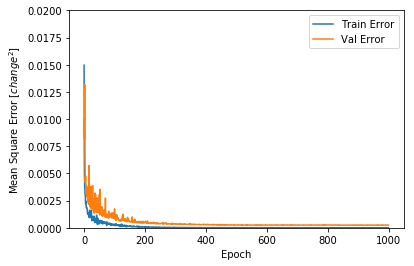

In [54]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [change]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,.1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$change^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,.02])
    plt.legend()
    plt.show()


plot_history(history)



................................

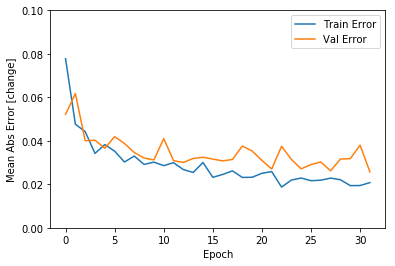

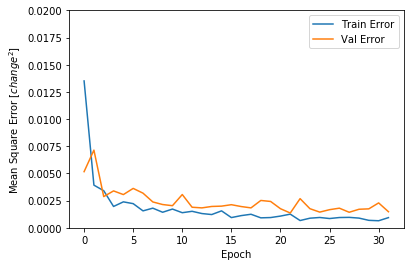

In [55]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, df_train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [56]:
loss, mae, mse = model.evaluate(normed_test_data, df_test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} change".format(mae))


Testing set Mean Abs Error:  0.03 change


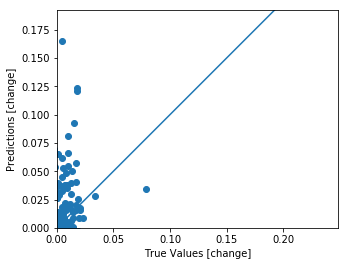

In [57]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(df_test_labels, test_predictions)
plt.xlabel('True Values [change]')
plt.ylabel('Predictions [change]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


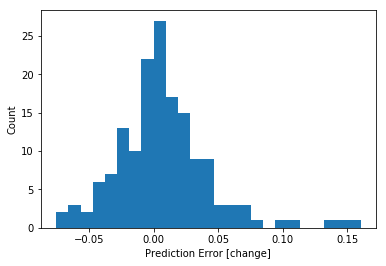

In [58]:
error = test_predictions - df_test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [change]")
_ = plt.ylabel("Count")
